# KNN

In [ ]:
import pandas as pd
db_data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2021.csv')

In [ ]:
db_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [ ]:
new_input=db_data[db_data.columns[1:]]
new_input.T
print(new_input.shape)
new_target=db_data['Diabetes_binary']
print(new_target.shape)

(236378, 21)
(236378,)


In [ ]:
# import numpy as np
# num_one_targets = int(np.sum(new_target))

# zero_targets_counter = 0
# indices_to_remove = []

# for i in range(new_target.shape[0]):
#     if new_target[i] == 0:
#         zero_targets_counter += 1
#         if zero_targets_counter > num_one_targets:
#             indices_to_remove.append(i)
# print(len(indices_to_remove))
# # print(new_target[indices_to_remove])
# # Create two new variables, one that will contain the inputs, and one that will contain the targets.
# # We delete all indices that we marked "to remove" in the loop above.
# balanced_inputs = new_input.drop(indices_to_remove)
# balanced_targets = new_target.drop(indices_to_remove)
# print(new_target.shape[0] - len(indices_to_remove))
# balanced_inputs.dropna(inplace=True)
# balanced_targets.dropna(inplace=True)
# zero_targets_counter = 0
# one_targets_counter = 0
# two_targets_counter = 0
# datasetSize = balanced_targets.shape[0]

# for i in range(datasetSize):
#     if(i not in indices_to_remove):
#       if balanced_targets[i] == 0:
#           zero_targets_counter += 1
#       elif balanced_targets[i] == 1:
#           one_targets_counter += 1

# print("Percent of people with no diabetes: ", zero_targets_counter)
# print("Percent of people with diabetes: ", one_targets_counter)

In [ ]:
from sklearn.model_selection import train_test_split
train_targets , test_targets, train_inputs , test_inputs = train_test_split(new_target,new_input, test_size=0.2, random_state=42, shuffle =True)

In [ ]:
print("train_inputs shape: ", train_inputs.shape)
print("train_targets shape: ", train_targets.shape)
print("test_inputs shape: ", test_inputs.shape)
print("test_targets shape: ", test_targets.shape)

train_inputs shape:  (189102, 21)
train_targets shape:  (189102,)
test_inputs shape:  (47276, 21)
test_targets shape:  (47276,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_inputs, train_targets)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predictions = knn.predict(test_inputs)

In [ ]:
print(predictions.shape)
print(test_targets.shape)
print(predictions)

(47276,)
(47276,)
[0. 1. 0. ... 0. 1. 0.]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_targets,predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     40587
         1.0       0.34      0.21      0.26      6689

    accuracy                           0.83     47276
   macro avg       0.61      0.57      0.58     47276
weighted avg       0.80      0.83      0.81     47276



[[37920  2667]
 [ 5307  1382]]


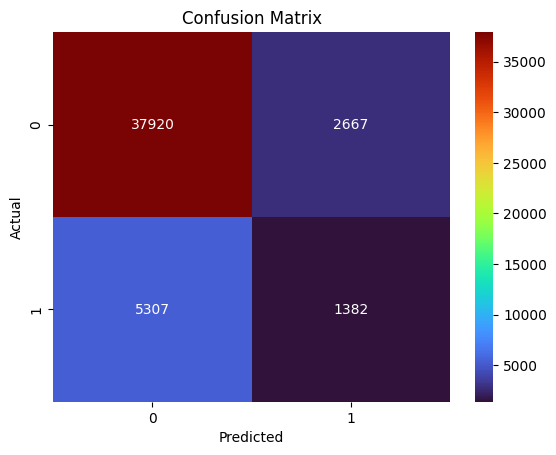

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(test_targets, predictions)
print(cm)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='turbo')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
target_resampled, input_resampled = sm.fit_resample(new_input, new_target)

In [ ]:
train_target_re_train,test_target_re_test,train_input_re_train,test_target_re_test = train_test_split(target_resampled, input_resampled, test_size=0.2, random_state=42)

In [ ]:
knn_smote = KNeighborsClassifier(n_neighbors = 5)
knn_smote.fit(train_input_re_train, train_target_re_train)